In [9]:
import requests
import time
import pandas as pd


class Page():
    def __init__(self, title, startdate):
        self.title = title
        self.startdate = startdate
        self._records = []
        print('Scraping for page {} starting on date {}'.format(title, startdate))
    
    def collect(self): # Yeah it's inelegant and repetitive but it gets the job done
        print('Scraping from {} forward'.format(self.startdate))
        data = self._scrape(self.startdate)
        records = [i.get('timestamp') 
                          for i in data['query']['pages'][0]['revisions']]
        self._records += records
        print('{} records found'.format(len(data['query']['pages'][0]['revisions'])))
        
        
        while len(data['query']['pages'][0]['revisions']) == 500:
            newStartDate = records[-1]
            print('Scraping from {} forward'.format(newStartDate))
            
            time.sleep(1)
            data = self._scrape(newStartDate)
            records = [i.get('timestamp') 
                          for i in data['query']['pages'][0]['revisions']]
            self._records += records
            print('{} records found'.format(len(data['query']['pages'][0]['revisions'])))
        
        print('Done scraping. Total of {} records collected ranging from {} to {}\n\n'
              .format(len(self._records), self._records[0], self._records[-1]))
        print('-'*20)
    
    
    def _scrape(self, start_point):  
        S = requests.Session()

        URL = "https://en.wikipedia.org/w/api.php"

        PARAMS = {
            "action": "query",
            "prop": "revisions",
            "rvlimit": "max",
            "titles": self.title,
            "rvprop": "timestamp|user|comment",
            "rvdir": "newer",
            "rvslots": "main",
            "formatversion": "2",
            "format": "json",
            "rvstart": start_point, #"2020-01-01T00:00:00Z"
        }

        R = S.get(url=URL, params=PARAMS)
        DATA = R.json()
        return DATA
    
    
# Combine it all into one big df
def summarizeResults(resultsList, start='2020-01-01', end='2020-07-31'):
    smmry = {}
    dates = [i.strftime('%Y-%m-%d') for i in pd.date_range(start=start,end=end)]
    for date in dates:
        matches = [i for i in resultsList if i.startswith(date)]
        smmry[date] = len(matches)
    return smmry

## 2020 election

In [2]:
people = ['Donald Trump', 'Joe Biden', 'Kamala Harris', 
          'Susan Rice', 'Tammy Duckworth', 'Elizabeth Warren', 
          'Karen Bass', 'Val Demings', 'Gretchen Whitmer',
          'Michelle Obama', 'Tammy Baldwin', 'Stacey Abrams', 'Keisha Lance Bottoms']
results = {}

for person in people:
    newpage = Page(person, '2020-01-01T00:00:00Z')
    newpage.collect()
    results[person] = newpage._records

Scraping for page Donald Trump starting on date 2020-01-01T00:00:00Z
Scraping from 2020-01-01T00:00:00Z forward
500 records found
Scraping from 2020-02-29T16:03:56Z forward
500 records found
Scraping from 2020-05-12T09:14:05Z forward
500 records found
Scraping from 2020-06-24T21:01:03Z forward
329 records found
Done scraping. Total of 1829 records collected ranging from 2020-01-01T00:00:11Z to 2020-08-01T20:18:26Z


--------------------
Scraping for page Joe Biden starting on date 2020-01-01T00:00:00Z
Scraping from 2020-01-01T00:00:00Z forward
500 records found
Scraping from 2020-04-16T00:39:20Z forward
497 records found
Done scraping. Total of 997 records collected ranging from 2020-01-01T19:42:00Z to 2020-07-31T22:31:47Z


--------------------
Scraping for page Kamala Harris starting on date 2020-01-01T00:00:00Z
Scraping from 2020-01-01T00:00:00Z forward
500 records found
Scraping from 2020-05-12T22:59:55Z forward
500 records found
Scraping from 2020-07-11T07:13:11Z forward
124 recor

In [3]:
summedResults = {}
for person, timestamps in results.items():
    summedResults[person] = summarizeResults(timestamps)
resultsDf = pd.DataFrame(summedResults)
resultsDf.head()

,Donald Trump,Elizabeth Warren,Gretchen Whitmer,Joe Biden,Kamala Harris,Karen Bass,Keisha Lance Bottoms,Michelle Obama,Stacey Abrams,Susan Rice,Tammy Baldwin,Tammy Duckworth,Val Demings
2020-01-01,2,0,0,1,2,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,1,0,0,0,1,0,0,0,0,0
2020-01-03,14,7,1,2,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-05,4,0,0,0,0,0,0,0,0,2,0,0,0
2020-01-06,5,1,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,5,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-08,10,0,0,5,0,0,0,0,0,1,0,4,0
2020-01-09,1,0,0,0,0,0,0,1,0,0,0,0,0
2020-01-10,20,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Group by week
resultsDf['Date'] = pd.to_datetime(resultsDf.index) - pd.to_timedelta(7, unit='d')
resultsDf = (resultsDf.groupby([pd.Grouper(key='Date', freq='W-MON')])
                .sum()
                .reset_index()
                .sort_values('Date'))
resultsDf.index = resultsDf['Date']
resultsDf

,Date,Donald Trump,Elizabeth Warren,Gretchen Whitmer,Joe Biden,Kamala Harris,Karen Bass,Keisha Lance Bottoms,Michelle Obama,Stacey Abrams,Susan Rice,Tammy Baldwin,Tammy Duckworth,Val Demings
Date,,,,,,,,,,,,,,
2019-12-30,2019-12-30,25,8,1,4,2,0,0,1,0,2,0,0,0
2020-01-06,2020-01-06,45,10,1,10,0,0,4,1,0,1,0,4,0
2020-01-13,2020-01-13,56,18,2,12,5,1,0,4,0,2,5,4,8
2020-01-20,2020-01-20,100,20,9,12,2,2,1,5,1,1,8,1,12
2020-01-27,2020-01-27,32,6,4,16,5,0,0,1,2,3,4,0,3
2020-02-03,2020-02-03,60,9,51,13,5,2,0,1,7,4,7,3,0
2020-02-10,2020-02-10,27,10,8,18,2,4,0,0,1,0,2,0,2
2020-02-17,2020-02-17,82,6,1,19,1,1,0,0,3,1,0,1,3
2020-02-24,2020-02-24,100,11,0,36,2,0,0,0,0,0,0,1,0


/home/edsouza/.local/lib/python3.5/site-packages/ipykernel/__main__.py:15: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


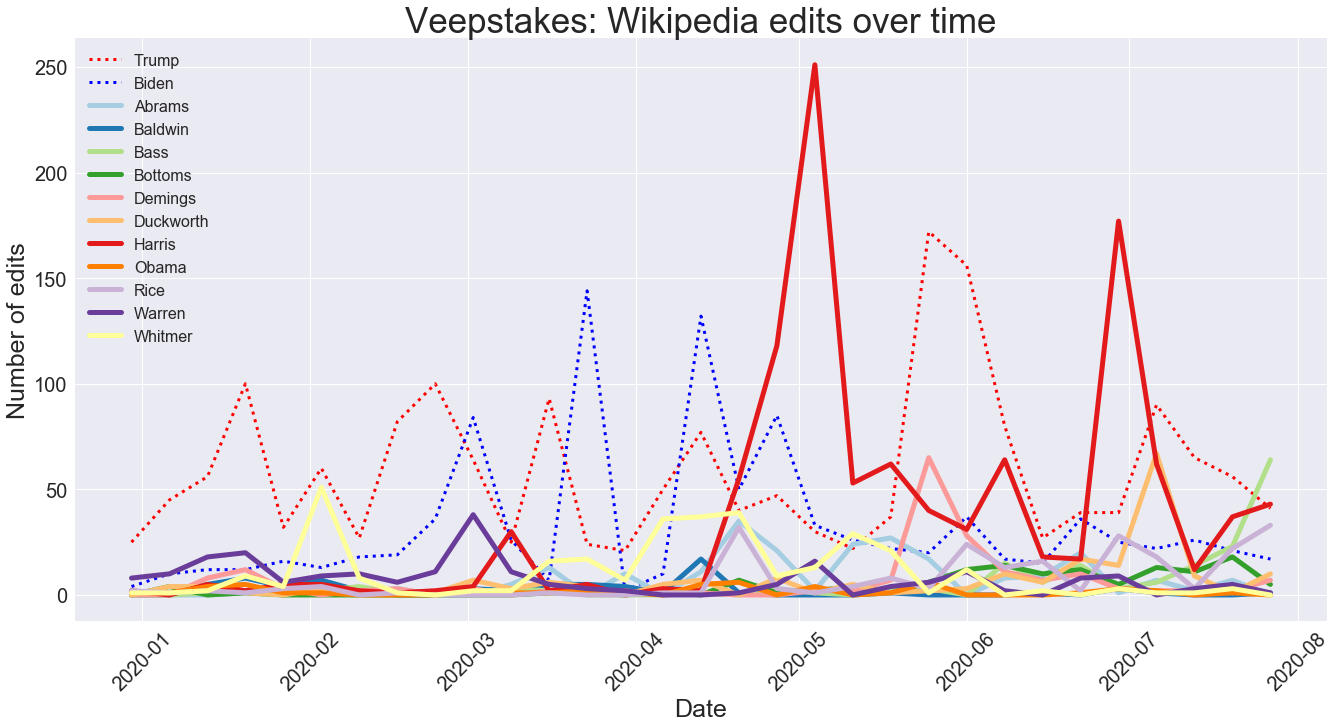

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


(fig, ax) = plt.subplots(1,1, figsize=(20,10))
ax.plot(resultsDf.Date, resultsDf['Donald Trump'], label = "Trump", color='red', ls=':', lw=3)
ax.plot(resultsDf.Date, resultsDf['Joe Biden'], label = "Biden", color='blue', ls=':', lw=3)


ax.set_color_cycle(sns.color_palette(['#a6cee3','#1f78b4','#b2df8a',
                                      '#33a02c','#fb9a99','#fdbf6f',
                                      '#e31a1c','#ff7f00','#cab2d6',
                                      '#6a3d9a','#ffff99','#b15928']))


for person in sorted([i for i in resultsDf.columns if i not in ['Joe Biden', 'Donald Trump', 'Date']],
                    key=lambda x: x.split(' ')[-1]):
    lastname = person.split(' ')[-1]
    ax.plot(resultsDf.Date, resultsDf[person], label=lastname, lw=5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, prop={'size': 16}, loc=2)


plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Number of edits', fontsize=25)
plt.title('Veepstakes: Wikipedia edits over time', fontsize=35)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    
plt.show()


## 2024 election

In [24]:
people = ['Donald Trump', 'Joe Biden', 'Kamala Harris', 
          'Marco Rubio', 'J. D. Vance', 'Ben Carson',
          'Doug Burgum', 'Tim Scott', 'Elise Stefanik', 
          'Kristi Noem', 'Tucker Carlson', 'Vivek Ramaswamy',
          'Ron DeSantis', 'Nikki Haley', 'Byron Donalds']
results = {}

for person in people:
    newpage = Page(person, '2024-01-01T00:00:00Z')
    newpage.collect()
    results[person] = newpage._records

Scraping for page Donald Trump starting on date 2024-01-01T00:00:00Z
Scraping from 2024-01-01T00:00:00Z forward


500 records found
Scraping from 2024-04-17T15:25:09Z forward
500 records found
Scraping from 2024-06-02T02:38:13Z forward
176 records found
Done scraping. Total of 1176 records collected ranging from 2024-01-01T02:26:37Z to 2024-06-24T09:36:57Z


--------------------
Scraping for page Joe Biden starting on date 2024-01-01T00:00:00Z
Scraping from 2024-01-01T00:00:00Z forward
334 records found
Done scraping. Total of 334 records collected ranging from 2024-01-01T02:27:55Z to 2024-06-24T21:41:53Z


--------------------
Scraping for page Kamala Harris starting on date 2024-01-01T00:00:00Z
Scraping from 2024-01-01T00:00:00Z forward
61 records found
Done scraping. Total of 61 records collected ranging from 2024-01-05T00:01:22Z to 2024-06-20T03:10:35Z


--------------------
Scraping for page Marco Rubio starting on date 2024-01-01T00:00:00Z
Scraping from 2024-01-01T00:00:00Z forward
30 records found
Done scraping. Total of 30 records collected ranging from 2024-01-13T02:36:10Z to 2024-06-22T1

In [25]:
from datetime import datetime

summedResults = {}
for person, timestamps in results.items():
    summedResults[person] = summarizeResults(timestamps, 
                                             '2024-01-01', 
                                             datetime.today().strftime('%Y-%m-%d'))
resultsDf = pd.DataFrame(summedResults)

# Group by week
resultsDf['Date'] = pd.to_datetime(resultsDf.index) - pd.to_timedelta(7, unit='d')
resultsDf = (resultsDf.groupby([pd.Grouper(key='Date', freq='W-MON')])
                .sum()
                .reset_index()
                .sort_values('Date'))
resultsDf.index = resultsDf['Date']
resultsDf.head()

,Date,Donald Trump,Joe Biden,Kamala Harris,Marco Rubio,J. D. Vance,Ben Carson,Doug Burgum,Tim Scott,Elise Stefanik,Kristi Noem,Tucker Carlson,Vivek Ramaswamy,Ron DeSantis,Nikki Haley,Byron Donalds
Date,,,,,,,,,,,,,,,,
2023-12-25,2023-12-25,3,4,0,0,0,0,0,0,0,0,0,0,2,3,0
2024-01-01,2024-01-01,20,11,1,0,2,14,3,1,27,2,2,0,6,11,2
2024-01-08,2024-01-08,24,14,0,1,3,3,5,3,10,4,2,4,3,12,0
2024-01-15,2024-01-15,19,12,0,6,4,4,12,6,3,2,3,33,38,63,0
2024-01-22,2024-01-22,28,13,3,1,10,1,2,2,8,1,2,1,9,36,0


/tmp/ipykernel_10114/814730577.py:38: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)
/tmp/ipykernel_10114/814730577.py:40: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(20)


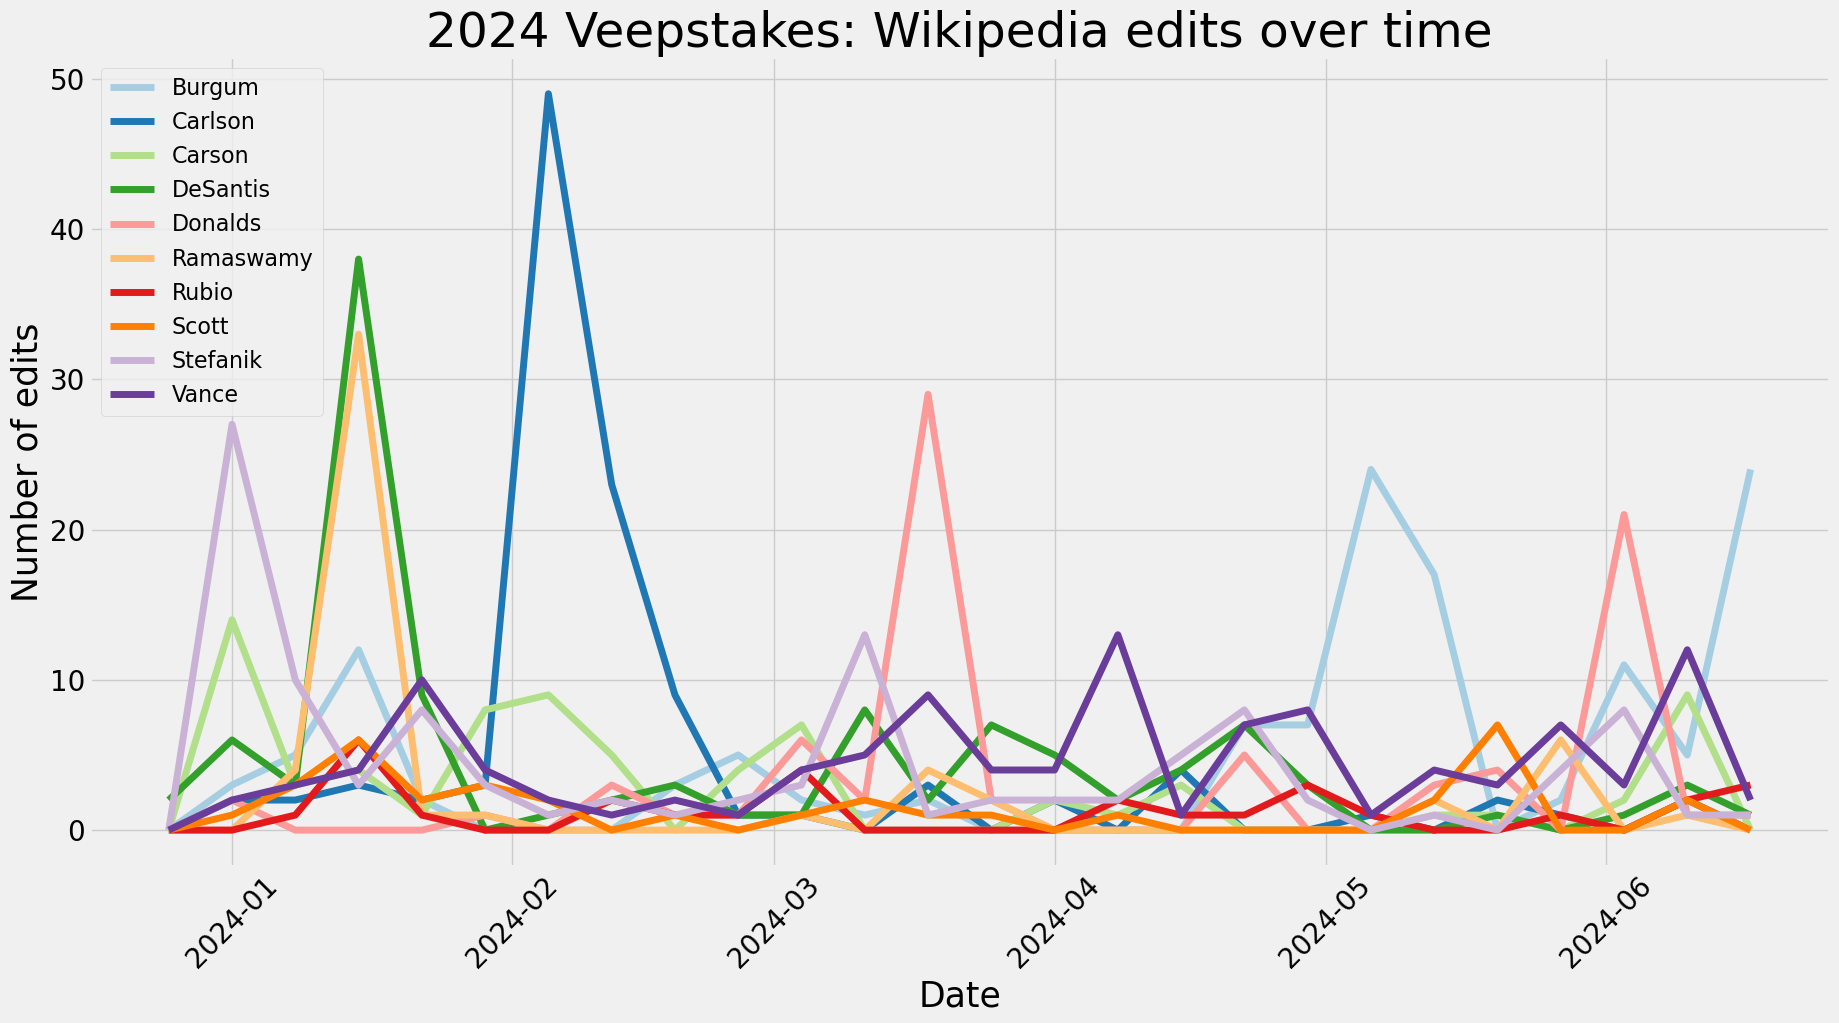

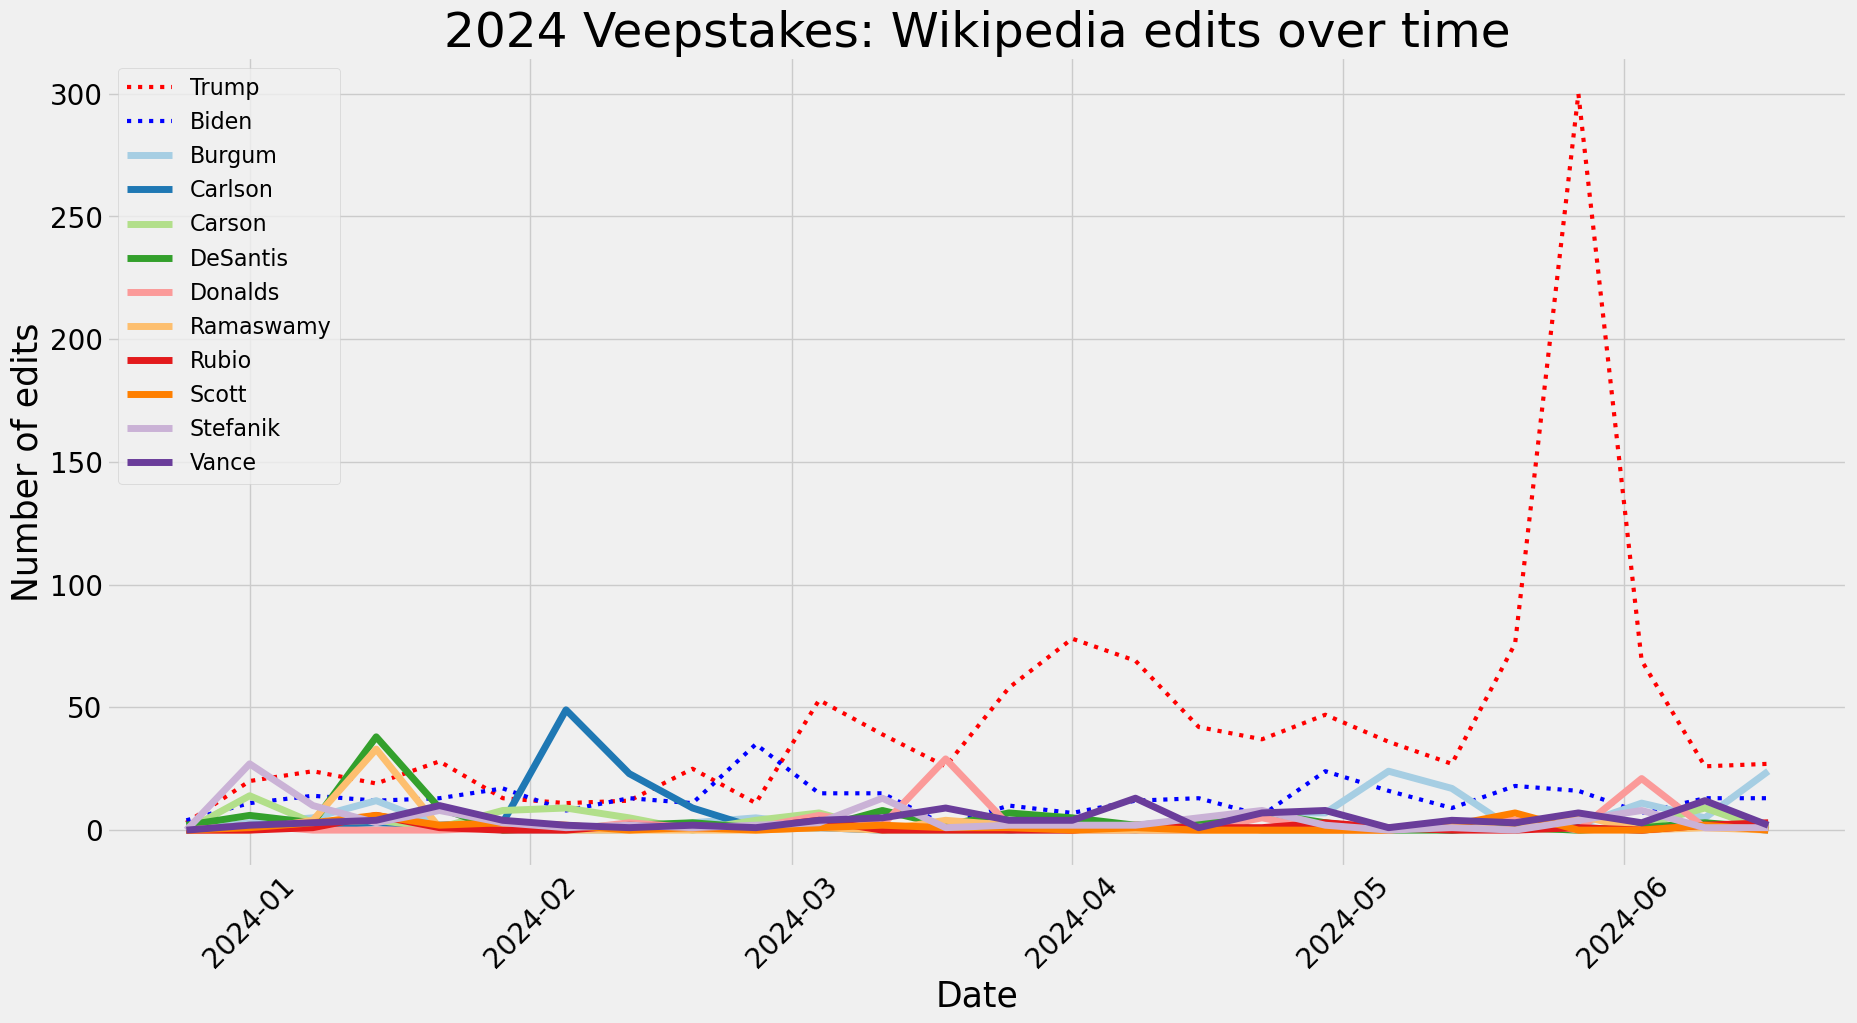

In [29]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns


def make_2024_plot(show_pres=False):
    (fig, ax) = plt.subplots(1,1, figsize=(20,10))
    
    if show_pres:
        ax.plot(resultsDf.Date, resultsDf['Donald Trump'], label = "Trump", color='red', ls=':', lw=3)
        ax.plot(resultsDf.Date, resultsDf['Joe Biden'], label = "Biden", color='blue', ls=':', lw=3)

    ax.set_prop_cycle(color=sns.color_palette(['#a6cee3','#1f78b4','#b2df8a',
                                        '#33a02c','#fb9a99','#fdbf6f',
                                        '#e31a1c','#ff7f00','#cab2d6',
                                        '#6a3d9a','#ffff99','#b15928']))


    # Noem and Haley's spikes were tied to specific news stories 
    # and end up drowning out some of the signal
    ignore_list = ['Joe Biden', 'Donald Trump', 'Kamala Harris', 
                   'Kristi Noem', 'Nikki Haley', 'Date']  
    for person in sorted([i for i in resultsDf.columns if i not in ignore_list],
                        key=lambda x: x.split(' ')[-1]):
        lastname = person.split(' ')[-1]
        ax.plot(resultsDf.Date, resultsDf[person], label=lastname, lw=5)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, prop={'size': 16}, loc=2)


    plt.xticks(rotation=45)
    plt.xlabel('Date', fontsize=25)
    plt.ylabel('Number of edits', fontsize=25)
    plt.title('2024 Veepstakes: Wikipedia edits over time', fontsize=35)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        
    plt.show()


make_2024_plot(show_pres=False)
make_2024_plot(show_pres=True)

There is definitely more noise compared to the 2020 cycle, but it seems that in the weeks leading up to the RNC, there is a consensus building around Burgum. This also appears to be reflected in the betting markets.